In [2]:
import numpy as np
import scipy as sp
import scipy.ndimage as ndimage
import random

import pollution

import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio.v2 as imageio
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick
import ipywidgets as widgets
from scipy.optimize import minimize_scalar, minimize
from matplotlib.lines import Line2D
# import moviepy.editor as mp

font = {        'size'   : 20}
mpl.rc('font', **font)
# %matplotlib notebook

In [24]:
T=200
N=100
D=[80]
R=5
phi=5
L = 50
runs=50
mu_mean = 0.8

pcp = np.zeros(T+1)
pce = np.zeros(T+1)
cc = np.zeros(T+1)

world=pollution.World(L=L,N=N,D=D[0],phi=5,R=5,M_nu=1,mu=mu_mean)
with imageio.get_writer(f'Animation/Imitation/L50_N100_D80_mu08.gif', mode='I') as writer:
    for i in trange(T+1):
        fig,ax=plt.subplots(figsize=(6,6))
        ax.imshow(world.get_type_grid(),cmap='bwr_r',vmin=-3,vmax=3) 
        pcp[i] = world.per_capita_pollution()
        pce[i] = world.per_capita_expense()
        clusters = world.observe_clusters()
        if len(clusters)>0:
            for c in range(len(clusters)):
                clusters[0].update(clusters[c])
            cc[i]=len(clusters[0])/len(world.agents)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        fig.savefig(f'Animation/Imitation/{i}.png',bbox_inches='tight')
        plt.close()
        world.step()
        image = imageio.imread(f'Animation/Imitation/{i}.png')
        writer.append_data(image)
        os.remove(f'Animation/Imitation/{i}.png')

100%|█████████████████████████████████████████| 201/201 [00:22<00:00,  8.80it/s]


(0.0, 50.0)

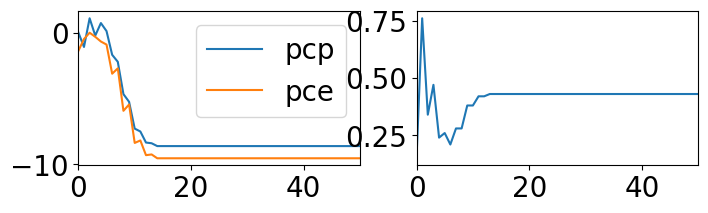

In [31]:
fig,axs = plt.subplots(figsize=(8,2),ncols=2)
axs[0].plot(range(T+1),pcp,label='pcp')
axs[0].plot(range(T+1),pce,label='pce')
axs[0].legend()
axs[1].plot(range(T+1),cc,label='cc')
axs[0].set_xlim([0,50])
axs[1].set_xlim([0,50])

# Ensemble Simulations

In [17]:
N=50
folder = f'Data/Imitation/N{N}/'
T=50
# D=[N//5,2*N//5,3*N//5,4*N//5]
D = [N//10,3*N//10,N//2,7*N//10,9*N//10]
R=5
phi=5
L = 50
runs=200
mu=np.arange(0,1.05,0.05)

pcp = np.zeros((len(D),len(mu),runs)) # change in pcp
cc = np.zeros((len(D),len(mu),runs)) # clustering
c_rate = np.zeros((len(D),len(mu),runs)) # cleaning rate

for k in trange(runs):
    for i in range(len(D)):
        for j in range(len(mu)):
            world = pollution.World(L=L,N=N,D=D[i],phi=5,R=5,M_nu=1,mu=mu[j])
            pcp[i,j,k] -= world.per_capita_pollution()
            for t in range(T):
                world.step()
            pcp[i,j,k] += world.per_capita_pollution()
            clusters = world.observe_clusters()
            if len(clusters)>0:
                for c in range(len(clusters)):
                    clusters[0].update(clusters[c])
                cc[i,j,k] = len(clusters[0])/len(world.agents)
            c_rate[i,j,k] = len([a for a in world.agents if a.type=='c'])
np.savetxt(folder+'pcp_oddD.csv',pcp.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'cc_oddD.csv',cc.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'c_rate_oddD.csv',c_rate.reshape(len(D)*len(mu),runs))

100%|███████████████████████████████████████| 200/200 [3:29:23<00:00, 62.82s/it]


In [18]:
N=80
folder = f'Data/Imitation/N{N}/'
T=50
# D=[N//5,2*N//5,3*N//5,4*N//5]
D = [N//10,3*N//10,N//2,7*N//10,9*N//10]
R=5
phi=5
L = 50
runs=200
mu=np.arange(0,1.05,0.05)

pcp = np.zeros((len(D),len(mu),runs)) # change in pcp
cc = np.zeros((len(D),len(mu),runs)) # clustering
c_rate = np.zeros((len(D),len(mu),runs)) # cleaning rate

for k in trange(runs):
    for i in range(len(D)):
        for j in range(len(mu)):
            world = pollution.World(L=L,N=N,D=D[i],phi=5,R=5,M_nu=1,mu=mu[j])
            pcp[i,j,k] -= world.per_capita_pollution()
            for t in range(T):
                world.step()
            pcp[i,j,k] += world.per_capita_pollution()
            clusters = world.observe_clusters()
            if len(clusters)>0:
                for c in range(len(clusters)):
                    clusters[0].update(clusters[c])
                cc[i,j,k] = len(clusters[0])/len(world.agents)
            c_rate[i,j,k] = len([a for a in world.agents if a.type=='c'])
np.savetxt(folder+'pcp_oddD.csv',pcp.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'cc_oddD.csv',cc.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'c_rate_oddD.csv',c_rate.reshape(len(D)*len(mu),runs))

100%|██████████████████████████████████████| 200/200 [5:41:23<00:00, 102.42s/it]


In [44]:
np.savetxt(folder+'pcp.csv',pcp.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'cc.csv',cc.reshape(len(D)*len(mu),runs))
np.savetxt(folder+'c_rate.csv',c_rate.reshape(len(D)*len(mu),runs))

# Figures

In [3]:
mu=np.arange(0,1.05,0.05)
D=[0.2,0.4,0.6,0.8]
L = 50
A = math.pi*(5**2)
runs=200
folder = 'Data/Imitation/N'
N = [20,50,80]
pcp = np.stack([np.loadtxt(folder+str(n)+'/pcp.csv').reshape(len(D),len(mu),runs) 
                for n in N])
cc = np.stack([np.loadtxt(folder+str(n)+'/cc.csv').reshape(len(D),len(mu),runs) 
               for n in N])
c_rate = np.stack([np.loadtxt(folder+str(n)+'/c_rate.csv').reshape(len(D),len(mu),runs)/n 
                   for n in N])

In [4]:
font = {        'size'   : 20}
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
mpl.rc('font', **font)
plt.rcParams.update(params)

In [5]:
D_corners = [0.1,0.3,0.5,0.7,0.9]
mu_corners = np.diff(np.array([-0.05]+list(mu)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)

Text(0.5, 0, 'Migration cost, $\\mu$')

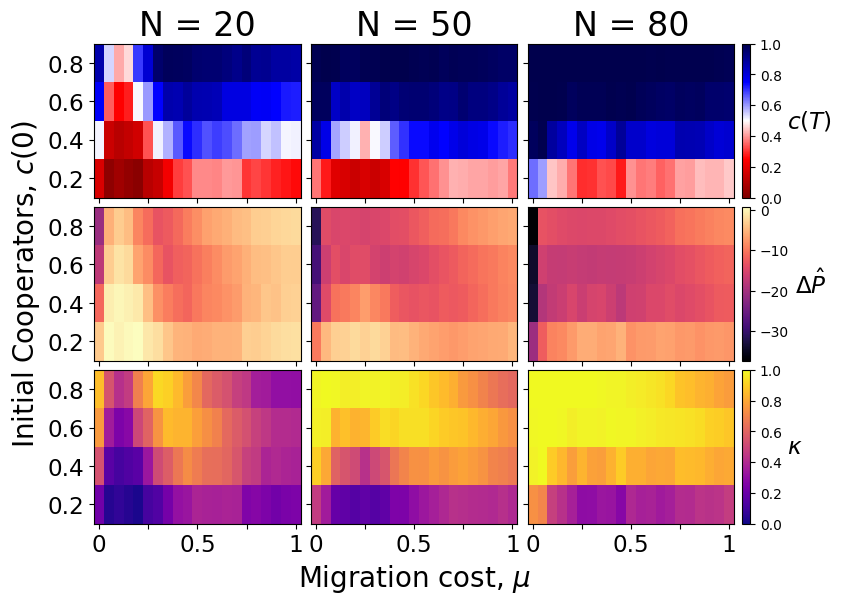

In [6]:
fig,axs=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(8,6))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
c_rate_lims = [np.min(c_rate.mean(axis=-1)),np.max(c_rate.mean(axis=-1))]
cc_lims = [np.min(cc.mean(axis=-1)),np.max(cc.mean(axis=-1))]
pcp_lims = [np.min(pcp[:,:,:,:].mean(axis=-1)),np.max(pcp.mean(axis=-1))]

ims=[0,0,0]
for i in range(3):
    axs[0,i].set_title(f"N = {N[i]}")
    ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(c_rate[i],axis=-1),
                        cmap='seismic_r',vmin=0,vmax=1)
    ims[1]=axs[1,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(pcp[i],axis=-1),
                        cmap='magma',vmin=pcp_lims[0],vmax=pcp_lims[1])
    ims[2]=axs[2,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(cc[i],axis=-1),vmin=0,vmax=1,cmap='plasma')
    
    axs[2,i].set_xticks([0,0.25,0.5,0.75,1])
    axs[2,i].set_xticklabels([0,'',0.5,'',1])
    axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
cb=[0,0,0]
c_labels=[r'$c(T)$',r'$\Delta\hat{P}$',r'$\kappa$']
for j in range(3):
#     axs[j,2].set_visible(False)
    pos = axs[j,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[j]=fig.colorbar(ims[j],cax=cax)
    cb[j].set_label(label=c_labels[j],size='small',rotation=0,va='center',ha='left')
    cb[j].ax.tick_params(labelsize=10)
    axs[j,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[j,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
plt.ylabel(r"Initial Cooperators, $c(0)$",size='medium')
plt.xlabel("Migration cost, $\mu$",size='medium')
# fig.savefig("Figures/Imitation/single_cost.png",bbox_inches='tight')

In [8]:
mu_grid,D_grid = np.meshgrid(mu,D)

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
c = ['red','green','blue']
for i in range(3):
    ax.contour(mu_grid,1-D_grid,np.mean(c_rate[i],axis=-1)-1+D_grid,levels=[0],colors=[c[i]])

In [17]:
D_all = np.array([int(d*n) for d in np.arange(0.2,1,0.2) for n in N])
print((D_all))
print(len(set(D_all)))

[ 4 10 16  8 20 32 12 30 48 16 40 64]
11


In [22]:
c_rate.shape

(3, 4, 21, 200)

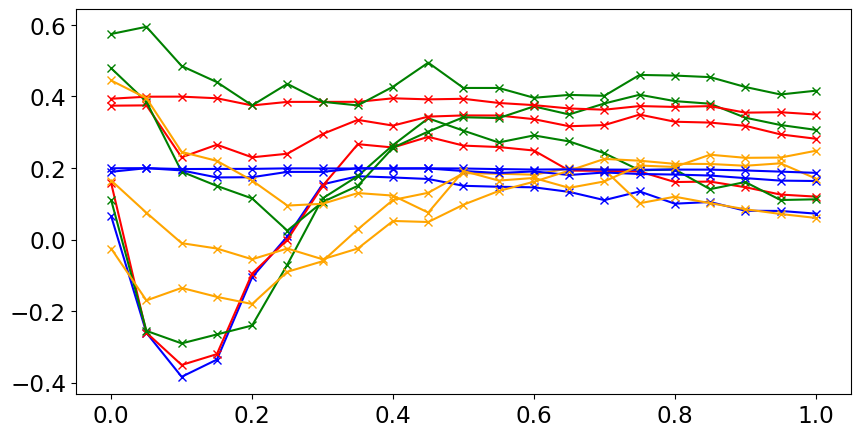

In [50]:
for i in range(4):
    plt.plot(mu[:],np.mean(c_rate[0,i,:,:],axis=-1)-np.array(D[::-1]).reshape(4,1),c='b',marker='x')
    plt.plot(mu[:],np.mean(c_rate[1,i,:,:],axis=-1)-np.array(D[::-1]).reshape(4,1),c='r',marker='x')
    plt.plot(mu[:],np.mean(c_rate[2,i,:,:],axis=-1)-.,c='g',marker='x')
    
# for j in range(3):
#     plt.plot(mu[:],np.mean(c_rate[j,0,:,:],axis=-1)-0.8,c='b',marker='x')
#     plt.plot(mu[:],np.mean(c_rate[j,1,:,:],axis=-1)-0.6,c='r',marker='x')
#     plt.plot(mu[:],np.mean(c_rate[j,2,:,:],axis=-1)-0.4,c='g',marker='x')
#     plt.plot(mu[:],np.mean(c_rate[j,3,:,:],axis=-1)-0.2,c='orange',marker='x')

# plt.plot(mu,np.mean(c_rate[0,2],axis=-1)+D[2]-1)
# plt.plot(mu,np.mean(c_rate[2,0],axis=-1)+D[0]-1)

## Correlations

In [12]:
print((cc.shape[:-1]))

(3, 4, 21)


In [6]:
corr = np.zeros((3,3,4,21))
for i in range(cc.shape[0]):
    for j in range(cc.shape[1]):
        for k in range(cc.shape[2]):
            corr[0,i,j,k] = np.corrcoef(c_rate[i,j,k,:],cc[i,j,k,:])[0,1] # c_rate vs cc
            corr[1,i,j,k] = np.corrcoef(c_rate[i,j,k,:],pcp[i,j,k,:])[0,1] # c_rate vs pcp
            corr[2,i,j,k] = np.corrcoef(pcp[i,j,k,:],cc[i,j,k,:])[0,1] # pcp vs cc
# R = np.corrcoef(c_rate,pcp,axis=-1)
# print(R.shape)

In [18]:
print(corr.shape)

(3, 3, 4, 21)


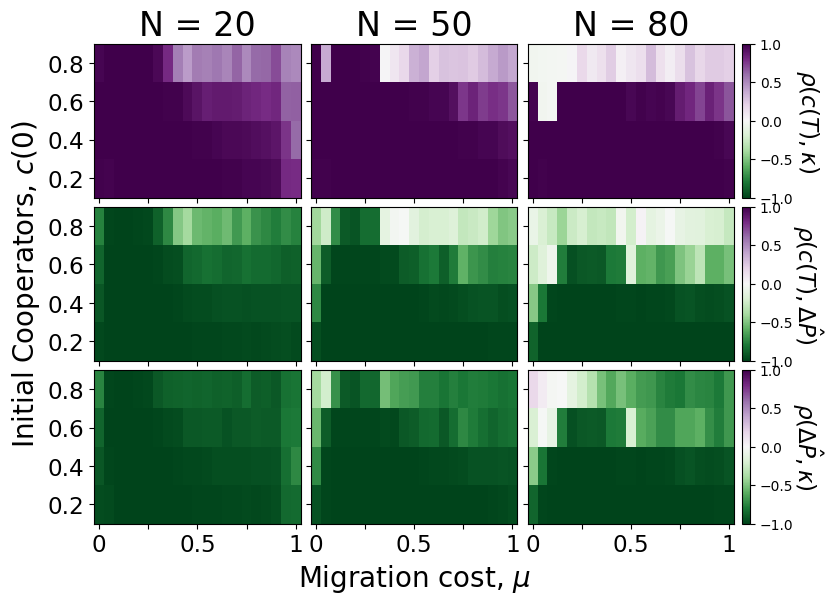

In [17]:
fig,axs=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(8,6))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
c_labels = [r"$\rho(c(T),\kappa)$",r"$\rho(c(T),\Delta \hat{P})$",r"$\rho(\Delta \hat{P},\kappa)$"]
ims=[0]*3
cb=[0]*3
for i in range(3):
    axs[0,i].set_title(f"N = {N[i]}")
    for j in range(3):
        ims[j]=axs[j,i].pcolormesh(mu_mesh,1-D_mesh,corr[j,i,:,:],
                        cmap='PRGn_r',vmin=-1,vmax=1)
    
    axs[2,i].set_xticks([0,0.25,0.5,0.75,1])
    axs[2,i].set_xticklabels([0,'',0.5,'',1])
    axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
#     axs[i,2].set_visible(False)
    pos = axs[i,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[i]=fig.colorbar(ims[i],cax=cax)
    cb[i].set_label(label=c_labels[i],size='small',rotation=-90,va='center',ha='center',labelpad=10)
    cb[i].ax.tick_params(labelsize=10)
#     axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
#     axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
plt.ylabel(r"Initial Cooperators, $c(0)$",size='medium')
plt.xlabel("Migration cost, $\mu$",size='medium')

# pos = ax_outer.get_position()
# cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
#                     0.01,pos.ymax-pos.ymin])  
# fig.colorbar(im,cax=cax,label=r"Pearson corr. coeff., $\rho$")
fig.savefig("Figures/Imitation/single_cost_correlations.png",bbox_inches='tight')